# Coursera Courses Analysis

### This project analyzes Coursera courses, focusing on:
course difficulty levels,

student enrollment,

course ratings,

the most/least popular courses.

The purpose is to understand what factors may contribute to course popularity and how students engage with different course types.

### Uploading and Loading the Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from outlier import get_outliers_per_column
df = pd.read_csv(r"C:\Users\Namai\Desktop\data analytics\Python EDA\coursea_data.csv", index_col=0)

## Data Cleaning

### Checking for Missing Values

In [5]:
df.isnull().values.any()

np.False_

### Checking for Duplicate Rows

In [6]:
df.duplicated().any()


np.False_

### Converting Students Enrolled Dtype to Numeric

In [7]:
df['course_students_enrolled'] = (
    df['course_students_enrolled']
    .str.replace('k', 'e3')
    .str.replace('m', 'e6')
    .astype(float)
    .astype(int)
)

### Identifying Outliers


In [8]:
outliers_dict = get_outliers_per_column(df)
for col, values in outliers_dict.items():
    print(f"Outliers in '{col}' ({len(values)}):")
    print(sorted(values)) 

Outliers in 'course_rating' (17):
[np.float64(3.3), np.float64(3.7), np.float64(3.9), np.float64(3.9), np.float64(4.0), np.float64(4.0), np.float64(4.1), np.float64(4.2), np.float64(4.2), np.float64(4.2), np.float64(4.2), np.float64(4.2), np.float64(4.2), np.float64(4.2), np.float64(4.2), np.float64(4.2), np.float64(4.2)]
Outliers in 'course_students_enrolled' (78):
[np.int64(230000), np.int64(230000), np.int64(230000), np.int64(240000), np.int64(240000), np.int64(240000), np.int64(240000), np.int64(240000), np.int64(250000), np.int64(250000), np.int64(260000), np.int64(260000), np.int64(260000), np.int64(260000), np.int64(260000), np.int64(270000), np.int64(270000), np.int64(270000), np.int64(270000), np.int64(270000), np.int64(270000), np.int64(270000), np.int64(280000), np.int64(280000), np.int64(280000), np.int64(280000), np.int64(280000), np.int64(290000), np.int64(290000), np.int64(290000), np.int64(300000), np.int64(300000), np.int64(310000), np.int64(310000), np.int64(310000), 

A total of 17 outliers were detected in course ratings indicating some courses have unusually low scores compared to the majority.

78 outliers were identified in the number of students enrolled indicating very popular courses with much higher enrollment than average.

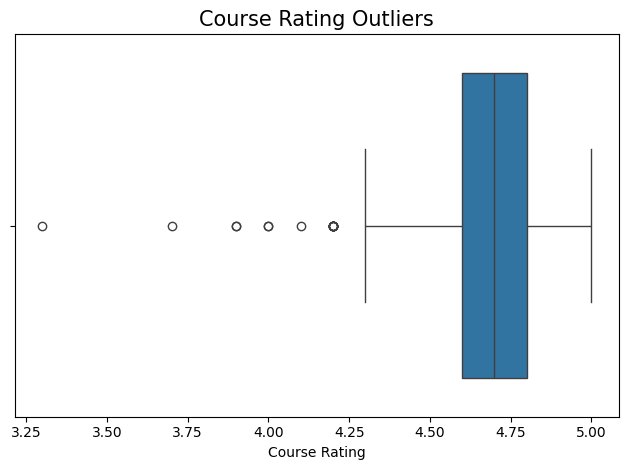

In [9]:
sns.boxplot(x=df['course_rating'])
plt.title('Course Rating Outliers', fontsize=15)
plt.xlabel('Course Rating')
plt.grid(False)
plt.tight_layout()
plt.show()


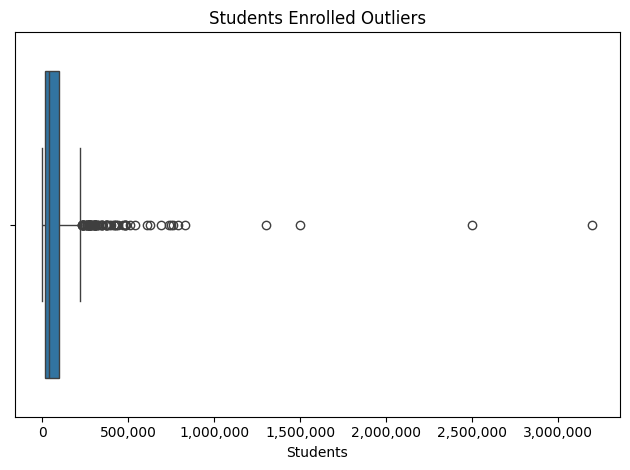

In [10]:
ax = sns.boxplot(x=df['course_students_enrolled'])
plt.title('Students Enrolled Outliers')
plt.xlabel('Students')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(False)
plt.tight_layout()
plt.show()

## Perform EDA

### What are Total Number of Courses and Total Students Enrolled?

In [11]:
total_courses = df['course_title'].nunique()
total_students = df['course_students_enrolled'].sum()

print(f'Total Number of Courses: {total_courses}')
print(f'Total Students Enrolled: {total_students:,}')


Total Number of Courses: 888
Total Students Enrolled: 80,681,900


### Which Courses Difficulty is the Most Popular?


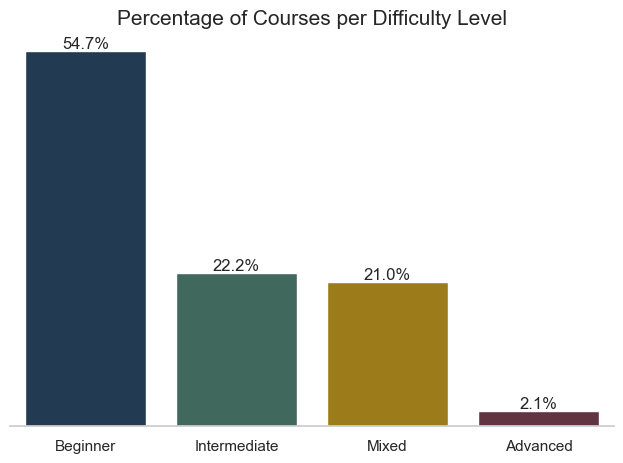

In [12]:
sns.set(style="whitegrid")

palette = {
    'Beginner': '#1b3b5a',
    'Intermediate': '#3b6e5f',
    'Advanced': '#6a2c3f',
    'Mixed': '#b28704'
}

counts = df['course_difficulty'].value_counts(normalize=True).sort_index() * 100
percent_df = counts.reset_index()
percent_df.columns = ['course_difficulty', 'percent']

ax = sns.barplot(
    x='course_difficulty',
    y='percent',
    data=percent_df,
    palette=palette,
    order=['Beginner', 'Intermediate', 'Mixed', 'Advanced'],
    hue='course_difficulty',
    legend=False,
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

ax.yaxis.set_visible(False)
sns.despine(left=True, right=True)

plt.title('Percentage of Courses per Difficulty Level', fontsize=15)
plt.xlabel('')
plt.tight_layout()
plt.show()



Most courses on Coursera are for beginners. Which shows that Coursera is focused on helping people who are just starting to learn.

Intermediate and mixed-level courses are also common. This means that people can continue learning and improving their skills after beginner courses.

There are only 2.1% advanced courses. This could mean that Coursera has less focus on very difficult or expert-level topics.

### Which Course Dificulity is Most Popular by Average Students Enrolled?

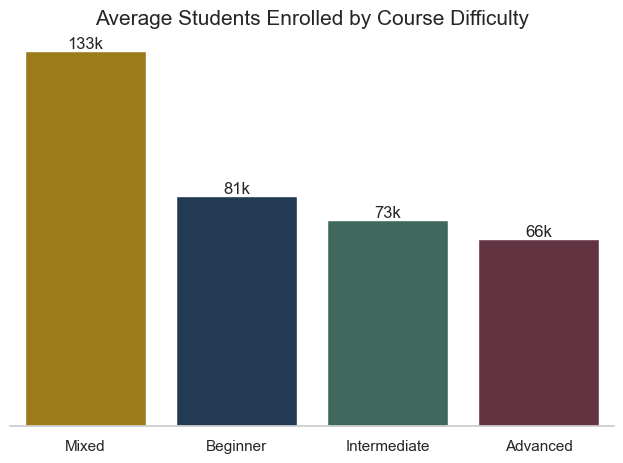

In [13]:
order = (
    df.groupby('course_difficulty')['course_students_enrolled']
    .mean()
    .sort_values(ascending=False)
    .index
)

ax = sns.barplot(
    x='course_difficulty',
    y='course_students_enrolled',
    data=df,
    palette=palette,
    order=order,
    hue='course_difficulty',
    legend=False,
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{int(bar.get_height() / 1000)}k' for bar in container]
    )

ax.yaxis.set_visible(False)
sns.despine(left=True, right=True)

plt.title('Average Students Enrolled by Course Difficulty', fontsize= 15)
plt.xlabel('')
plt.tight_layout()
plt.show()


Mixed difficulty courses attract the most students, showing high interest in flexible, all-level content.

Beginner courses are also popular, likely because they are easy to start.

Intermediate and advanced courses attract fewer students, suggesting less demand for more complex material.

Students prefer accessible or mixed-level courses over highly specialized ones.

### What Average Course Rating Does Each Difficulty Have?


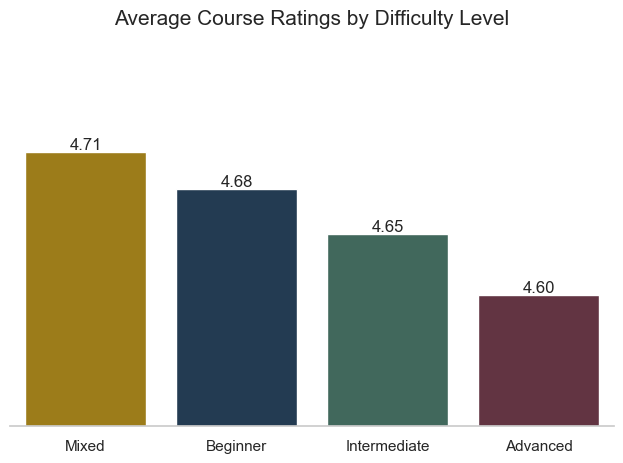

In [14]:
order = (
    df.groupby('course_difficulty')['course_rating']
    .mean()
    .sort_values(ascending=False)
    .index
)

ax = sns.barplot(
    x='course_difficulty',
    y='course_rating',
    data=df,
    palette=palette,
    order=order,
    errorbar=None,
    hue='course_difficulty',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

ax.yaxis.set_visible(False)
sns.despine(left=True, right=True)

plt.ylim(4.5, 4.8)
plt.title('Average Course Ratings by Difficulty Level', fontsize= 15)
plt.xlabel('')
plt.tight_layout()
plt.show()


Mixed difficulty courses have the highest average rating, showing that students are very satisfied with these flexible courses.

Beginner courses are also highly rated, likely because they are accessible and easy to follow.

Intermediate and advanced courses have lower ratings, which may suggest they are harder or less engaging for students.

Overall, simpler or mixed-level courses tend to receive better feedback.

### Is There Correlation Between Course Rating and Number of Students Enrolled?

In [15]:
correlation = df['course_rating'].corr(df['course_students_enrolled'])
print(f'Correlation between course rating and students enrolled: {correlation:.3f}')

Correlation between course rating and students enrolled: 0.071


The correlation between course rating and number of students enrolled is very low (0.071).

Other factors like topic, difficulty, or institution likely have more influence on enrollment.

### Which Courses are the Most Popular?

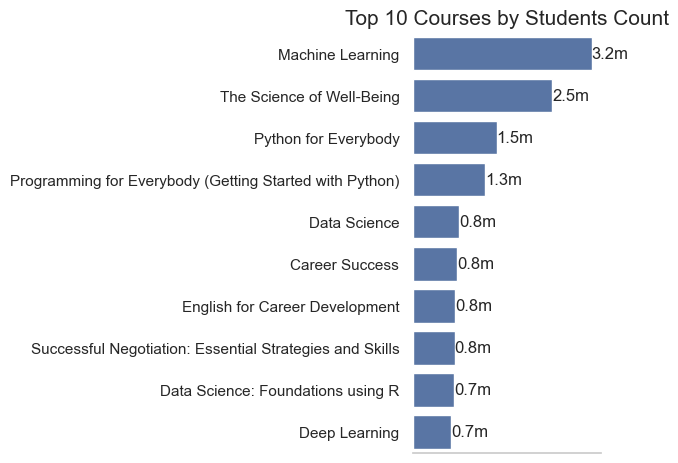

In [16]:
top_courses = (
    df.sort_values(by='course_students_enrolled', ascending=False)
    .head(10)
)

ax = sns.barplot(
    y=top_courses['course_title'],
    x=top_courses['course_students_enrolled'] / 1_000_000
)

ax.bar_label(ax.containers[0], fmt='%.1fm')

ax.xaxis.set_visible(False)
sns.despine(left=True, right=True)

plt.title('Top 10 Courses by Students Count', fontsize= 15)
plt.ylabel('')
plt.tight_layout()
plt.show()

"Machine Learning"  is the most popular course with 3.2M students.

"The Science of Well-Being" ranks second with 2.5M students.

Python and Data Science courses also dominate the top spots, showing strong global demand for tech skills.

### Which Courses are the Least Popular?

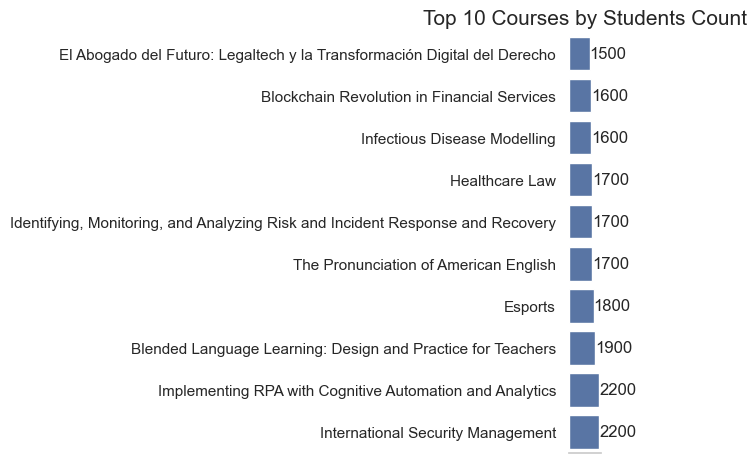

In [17]:
last_courses = (
    df.sort_values(by='course_students_enrolled', ascending=True)
    .head(10)
)

ax = sns.barplot(
    y=last_courses['course_title'],
    x=last_courses['course_students_enrolled']
)

ax.bar_label(ax.containers[0], fmt='%.0f')

ax.xaxis.set_visible(False)
sns.despine(left=True, right=True)

plt.title('Top 10 Courses by Students Count', fontsize= 15)
plt.ylabel('')
plt.tight_layout()
plt.show()

Compared to the top courses, the last 10 courses have significantly lower enrollments (from 1,500 to 2,200 students).

These courses cover more specialized or niche topics such as legal tech, healthcare law, and esports.

## Overview:
- Most courses are Beginner level, while Advanced courses are very few.
This shows Coursera mainly targets learners starting out or at intermediate levels.

- Mixed difficulty courses attract the highest average enrollments (~133k students per course), followed by Beginner (~81k).
Students prefer flexible courses that cover multiple skill levels or are easy to start.

- Beginner and Mixed courses have the highest average ratings (4.68 and 4.71 respectively), while Advanced courses have slightly lower ratings (4.6).
Simpler or more accessible courses tend to satisfy students more.

- There is almost no correlation between course rating and number of students enrolled (correlation ~0.07).
This means other factors—like course topic, institution, or marketing—likely drive popularity more than ratings.

## Suggestions About How Your Analysis can be Improved:

- Time-based trends: Analyzing how course popularity changes over time.

- Data enrichment: Adding more detailed course attributes (such as course length, course fees) could improve the depth of the analysis.